In [66]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-df-2.csv', \
                 encoding = 'utf-8', header = 0)
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-src-2.csv', \
                        encoding = 'utf-8', header =0)

In [68]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')

In [69]:
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro,cleaned_src_tw,src_sentiment,src_emo_ro
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982355e+17,1.539100e+09,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenage boys not men children stop refer...,Negative,anger,black teenage boys not men children stop refer...,Negative,anger


In [70]:
g = df1.loc[df1.label==1].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

h = df1.loc[df1.label==0].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

<AxesSubplot:xlabel='reply_sentiment', ylabel='src_sentiment'>

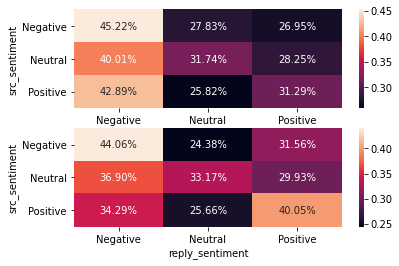

In [71]:
fig, axes = plt.subplots(2, 1)
sns.heatmap(ax=axes[0],data = g, annot=True,fmt='.2%')
sns.heatmap(ax=axes[1],data = h, annot=True,fmt='.2%')

# Combine ALL Events

In [72]:
import os
path = r'D:\論文\PHEME9\Data\CSV'

In [73]:
import pathlib
data_temp = sorted(pathlib.Path(path).glob('*-2.csv'))

In [88]:
i = 0
all_data = pd.DataFrame()
size = 0 

In [89]:
while i <len(data_temp):
    rep = pd.read_csv(data_temp[i],encoding = 'utf-8', header = 0)
    src = pd.read_csv(data_temp[i+1], encoding = 'utf-8', header =0)
    df_merge = pd.merge(rep, src[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
    length = rep.shape[0]
    size = size +length
    print(size)
    all_data = all_data.append(df_merge)
    i = i+2

33628
55357
58961
59125
69503
70126
70698
92055


In [90]:
all_data.shape

(92055, 15)

## Sentiment analysis

In [91]:
rumor = all_data.loc[all_data.label==1].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

nonrumor =all_data.loc[all_data.label==0].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

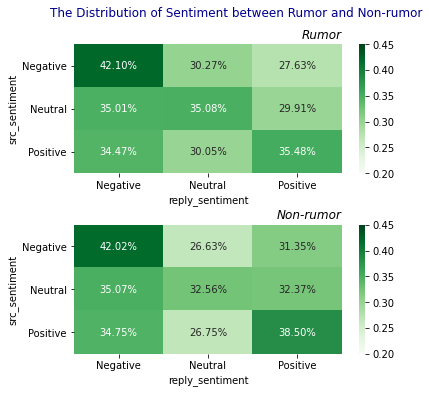

In [185]:
fig, axes = plt.subplots(2, 1)
fig.suptitle('The Distribution of Sentiment between Rumor and Non-rumor', y =1.33, color = 'darkblue')
sns.heatmap(ax=axes[0],data = rumor, annot=True,fmt='.2%',cmap='Greens',vmin=0.2, vmax = 0.45)
sns.heatmap(ax=axes[1],data = nonrumor, annot=True,fmt='.2%',cmap='Greens',vmin=0.2, vmax = 0.45)


axes[0].set_title('Rumor',fontstyle='italic',loc='right')
axes[1].set_title('Non-rumor',fontstyle='italic',loc='right')
plt.subplots_adjust(top = 1.2,hspace=0.4)

## Emotion analysis

In [120]:
rumor_em = all_data.loc[all_data.label==1].groupby(['src_emo_ro'])['reply_emo_ro'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_emo_ro','reply_emo_ro','count')

nonrumor_em =all_data.loc[all_data.label==0].groupby(['src_emo_ro'])['reply_emo_ro'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_emo_ro','reply_emo_ro','count')

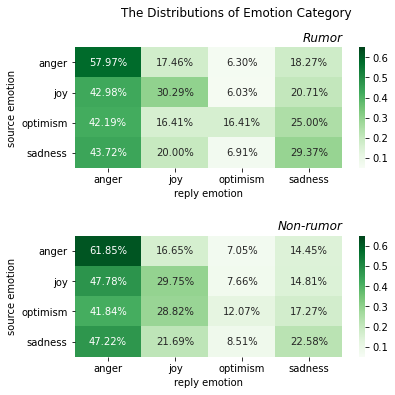

In [190]:
fig, axes = plt.subplots(2, 1)
fig.suptitle('The Distributions of Emotion Category', y =1.34)
sns.heatmap(ax=axes[0],data = rumor_em, annot=True,fmt='.2%',vmin=0.05, vmax = 0.65,cmap='Greens')
sns.heatmap(ax=axes[1],data = nonrumor_em, annot=True,fmt='.2%',vmin=0.05, vmax = 0.65,cmap='Greens')

axes[0].set(xlabel = 'reply emotion',ylabel = 'source emotion')
axes[1].set(xlabel = 'reply emotion',ylabel = 'source emotion')
axes[0].set_title('Rumor',fontstyle='italic',loc='right')
axes[1].set_title('Non-rumor',fontstyle='italic',loc='right')

plt.subplots_adjust(top = 1.2,hspace=0.56)